In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
train.rename(columns={'Date of Birth': 'dob',
                   'Flight Date': 'fd',
                    'Booking Date':'bd'},
          inplace=True, errors='raise')

In [3]:
test = pd.read_csv('test.csv')
test.rename(columns={'Date of Birth': 'dob',
                   'Flight Date': 'fd',
                    'Booking Date':'bd'},
          inplace=True, errors='raise')
test.head()

,Name,dob,From,To,fd,Flight Time,bd,Class
0,Miss FG36 FS44,2004-06-26,Delhi,Lucknow,2016-04-04,19:40,2016-02-17,Economy
1,Dr. MG31 MS2,1961-04-30,Lucknow,Delhi,2016-03-08,17:50,2016-01-25,Economy
2,Dr. FG10 FS22,1966-08-28,Lucknow,Delhi,2016-01-11,13:30,2015-12-29,Business
3,Dr. FG18 FS12,1958-03-22,Lucknow,Mumbai,2016-10-13,13:20,2016-09-12,Economy
4,Miss FG14 FS33,2000-02-01,Chennai,Delhi,2016-09-24,17:50,2016-09-03,Economy


In [4]:
len(train), len(test)

(7500, 2500)

In [5]:
names =  train.Name
is_dr = []
for n in names:
    if n.split(' ')[0] == 'Dr.':
        is_dr.append(1)
    else:
        is_dr.append(0)
train['is_dr'] = is_dr 

names = test.Name
is_dr = []
for n in names:
    if n.split(' ')[0] == 'Dr.':
        is_dr.append(1)
    else:
        is_dr.append(0)
test['is_dr'] = is_dr

In [6]:
import re
from time import time

In [7]:
def add_date(df,fldnames,drop = True, errors = 'raise', time= False):
    if isinstance(fldnames,str): 
        fldnames = [fldnames]
    for fldname in fldnames:
        fld = df[fldname]
        fld_dtype = fld.dtype
        if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
            fld_dtype = np.datetime64

        if not np.issubdtype(fld_dtype, np.datetime64):
            df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
     
        targ_pre = re.sub('[Dd]ate$', '', fldname)
        attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
                'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
        if time: attr = attr + ['Hour', 'Minute', 'Second']
        for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
        df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
        if drop: df.drop(fldname, axis=1, inplace=True)

In [8]:
add_date(train, ['dob', 'fd', 'bd'])
add_date(test, ['dob', 'fd', 'bd'])

In [9]:
train['age'] = train.dobYear - train.fdYear

In [10]:
train['is_bdbd'] = (np.array((train.dobMonth == train.bdMonth)) * np.array((train.dobDay == train.bdDay)))
train['is_fdbd'] = (np.array((train.dobMonth == train.fdMonth)) * np.array((train.dobDay == train.fdDay)))

In [11]:
test['age'] = test.dobYear - test.fdYear
test['is_bdbd'] = (np.array((test.dobMonth == test.bdMonth)) * np.array((test.dobDay == test.bdDay)))
test['is_fdbd'] = (np.array((test.dobMonth == test.fdMonth)) * np.array((test.dobDay == test.fdDay)))

In [12]:
train['depgap'] = train.fdDayofyear - train.bdDayofyear
test['depgap'] = test.fdDayofyear - test.bdDayofyear


In [13]:
train['is_weekend'] = (np.array(train.fdDayofweek == 5) +np.array(train.fdDayofweek == 6))
test['is_weekend'] = (np.array(test.fdDayofweek == 5) +np.array(test.fdDayofweek == 6))

In [14]:
to_drop = ['dobYear', 'dobMonth', 'dobWeek', 'dobDay', 'dobDayofweek',
       'dobDayofyear', 'dobIs_month_end', 'dobIs_month_start',
       'dobIs_quarter_end', 'dobIs_quarter_start', 'dobIs_year_end',
       'dobIs_year_start', 'dobElapsed','fdDayofyear','fdElapsed', 'bdYear','bdElapsed']

In [15]:
train.drop(to_drop, axis =1,inplace=True)

In [16]:
test.drop(to_drop,axis =1, inplace=True)

In [17]:
train['age'] = train['age']*-1
test['age'] = test['age']*-1

In [18]:
dict_cities = {'Mumbai':1 , 'Patna' : 2, 'Kolkata' : 3, 'Delhi' : 4, 'Hyderabad': 5, 'Lucknow': 6, 'Chennai':7}
dict_class = {'Business':25, 'Economy': 10}
train = train.replace({'From':dict_cities})
test = test.replace({'From':dict_cities})
train = train.replace({'To': dict_cities})
test = test.replace({'To': dict_cities})
train = train.replace({'Class':dict_class})
test = test.replace({'Class':dict_class})

In [19]:
def label_distance (row):
   if (row['From'] == 1 and row['To'] == 2) or (row['From'] == 2 and row['To'] == 1):
        return 1446
   if (row['From'] == 1 and row['To'] == 3) or (row['From'] == 3 and row['To'] == 1):
        return 1654
   if (row['From'] == 1 and row['To'] == 4) or (row['From'] == 4 and row['To'] == 1):
        return 1148
   if (row['From'] == 1 and row['To'] == 5) or (row['From'] == 5 and row['To'] == 1):
        return 622
   if (row['From'] == 1 and row['To'] == 6) or (row['From'] == 6 and row['To'] == 1):
        return 1190
   if (row['From'] == 1 and row['To'] == 7) or (row['From'] == 7 and row['To'] == 1):
        return 1028
   if (row['From'] == 2 and row['To'] == 3) or (row['From'] == 3 and row['To'] == 2):
        return 470
   if (row['From'] == 2 and row['To'] == 4) or (row['From'] == 4 and row['To'] == 2):
        return 480
   if (row['From'] == 2 and row['To'] == 5) or (row['From'] == 5 and row['To'] == 2):
        return 1140
   if (row['From'] == 2 and row['To'] == 6) or (row['From'] == 6 and row['To'] == 2):
        return 437
   if (row['From'] == 2 and row['To'] == 7) or (row['From'] == 7 and row['To'] == 2):
        return 1485
   if (row['From'] == 3 and row['To'] == 4) or (row['From'] == 4 and row['To'] == 3):
        return 1307
   if (row['From'] == 3 and row['To'] == 5) or (row['From'] == 5 and row['To'] == 3):
        return 1180
   if (row['From'] == 3 and row['To'] == 6) or (row['From'] == 6 and row['To'] == 3):
        return 886
   if (row['From'] == 3 and row['To'] == 7) or (row['From'] == 7 and row['To'] == 3):
        return 1366
   if (row['From'] == 4 and row['To'] == 5) or (row['From'] == 5 and row['To'] == 4):
        return 1253
   if (row['From'] == 4 and row['To'] == 6) or (row['From'] == 6 and row['To'] ==  4):
        return 417
   if (row['From'] == 4 and row['To'] == 7) or (row['From'] == 7 and row['To'] == 4):
        return 1760
   if (row['From'] == 5 and row['To'] == 6) or (row['From'] == 6 and row['To'] == 5):
        return 1425
   if (row['From'] == 5 and row['To'] == 7) or (row['From'] == 7 and row['To'] == 5):
        return 520
   if (row['From'] == 6 and row['To'] == 7) or (row['From'] == 7 and row['To'] == 6):
        return 1534
   return None

In [20]:
train['distance'] = train.apply (lambda row: label_distance (row),axis=1)
test['distance'] =test.apply (lambda row: label_distance (row),axis=1)

In [21]:
time_from = {}
time_from['1'] = [0,130,140,120,75,130,89]
time_from['2'] = [205,0,60,95,104,39,134]
time_from['3'] = [155,90,0,120,120,105,135]
time_from['4'] = [115,80,115,0,120,55,155]
time_from['5'] = [70,104,115,125,0,235,65]
time_from['6'] = [130,39,100,60,245,0,138]
time_from['7'] = [95,134,115,155,65,138,0]
def label_duration (row):
    return time_from[str(int(row['From']))][int(row['To'])-1]


train['flight_duration'] = train.apply (lambda row: label_duration (row),axis=1)
test['flight_duration'] = test.apply (lambda row: label_duration (row),axis=1)

In [22]:
dg = train.depgap
for i in range(len(dg)):
    if dg[i] < 0:
        dg[i] +=365
train.depgap = dg

dg = test.depgap
for i in range(len(dg)):
    if dg[i] < 0:
        dg[i] +=365
test.depgap = dg


C:\Users\irfan\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\irfan\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [23]:
drop = ['Name','From', 'To']
train.drop(drop, axis=1, inplace=True)
test.drop(drop, axis=1, inplace=True)

In [24]:
train['Flight Time'] = (train['Flight Time'].str.split(':').str[0]).astype(int)
test['Flight Time'] = (test['Flight Time'].str.split(':').str[0]).astype(int)

In [25]:
x_train = train.drop('Fare', axis=1)
y_train = train.Fare.copy()

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
en = ['is_weekend','is_fdbd', 'is_bdbd','bdIs_year_start','fdIs_month_end', 'fdIs_month_start',
       'fdIs_quarter_end', 'fdIs_quarter_start', 'fdIs_year_end',
       'fdIs_year_start','bdIs_month_end', 'bdIs_month_start', 'bdIs_quarter_end',
       'bdIs_quarter_start', 'bdIs_year_end', 'bdIs_year_start']
for c in en:
       train[c] = le.fit_transform(train[c])
       test[c] = le.fit_transform(test[c])

In [28]:
train.to_csv('train_prep.csv',index=False)

In [29]:
test.to_csv('test_prep.csv',index=False)

## Modeling

In [40]:
from pycaret.regression import *

In [41]:
reg1 = setup(data = train, target = 'Fare')

,Description,Value
0,session_id,767
1,Target,Fare
2,Original Data,"(7500, 33)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,22
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(5249, 66)"


In [42]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [44]:
best_specific = compare_models(include = ['dt','rf','xgboost','catboost','gbr','et','lightgbm','ada','svm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,321.1,4.744e+05,663.9,0.989,0.0556,0.0408,1.841
lightgbm,Light Gradient Boosting Machine,491.2,1.166e+06,1050,0.9731,0.075,0.0562,0.255
xgboost,Extreme Gradient Boosting,561,1.289e+06,1126,0.9693,0.0876,0.0651,1.221
gbr,Gradient Boosting Regressor,805,2.34e+06,1510,0.945,0.1287,0.0954,0.64
rf,Random Forest Regressor,941.2,3.532e+06,1869,0.9156,0.1292,0.0989,1.264
et,Extra Trees Regressor,981.9,3.771e+06,1927,0.9106,0.133,0.105,1.336
dt,Decision Tree Regressor,1293,8.245e+06,2836,0.8015,0.1805,0.1304,0.926
ada,AdaBoost Regressor,5013,2.983e+07,5459,0.2696,0.7066,0.9675,0.371
svm,Support Vector Regression,4110,4.457e+07,6657,-0.0651,0.6377,0.5406,1.8


In [45]:
cat = create_model('catboost')
# tune hyperparameters of decision tree
tuned_cat = tune_model(cat)
# # tune hyperparameters with increased n_iter
# tuned_dt = tune_model(dt, n_iter = 50)
# # tune hyperparameters to optimize AUC
# tuned_dt = tune_model(dt, optimize = 'AUC') #default is 'Accuracy'

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,423.2,5.439e+05,737.5,0.9846,0.0789,0.0567
1,501.2,1.949e+06,1396,0.9569,0.0726,0.0535
2,405.4,6.61e+05,813,0.9829,0.0717,0.053
3,407.7,5.625e+05,750,0.9852,0.0713,0.0516
4,427.4,7.557e+05,869.3,0.9798,0.0774,0.0553
5,534.2,2.369e+06,1539,0.9562,0.0778,0.0563
6,483.4,1.082e+06,1040,0.9715,0.0731,0.0539
7,427.3,8.703e+05,932.9,0.9775,0.067,0.0487
8,504.7,2.129e+06,1459,0.9602,0.0731,0.0528
9,423.3,5.988e+05,773.8,0.9849,0.078,0.0561


In [54]:
xgb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,539.3,1.04e+06,1020,0.9705,0.0882,0.0668
1,602.4,1.741e+06,1319,0.9615,0.0879,0.0652
2,520.7,9.252e+05,961.9,0.976,0.0877,0.0644
3,568.7,1.278e+06,1131,0.9664,0.085,0.0633
4,531.5,1.18e+06,1086,0.9684,0.0827,0.0628
5,607.3,1.913e+06,1383,0.9646,0.0902,0.0673
6,576.9,1.508e+06,1228,0.9603,0.0933,0.0659
7,513.6,8.492e+05,921.5,0.9781,0.0804,0.0606
8,585.7,1.336e+06,1156,0.975,0.0926,0.069
9,563.6,1.12e+06,1058,0.9718,0.0879,0.066


In [56]:
tuned_xgb = tune_model(xgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,854.8,1.959e+06,1400,0.9444,0.1346,0.1081
1,887.2,3.554e+06,1885,0.9214,0.1275,0.0996
2,806.1,2.579e+06,1606,0.9331,0.1303,0.0987
3,888.5,2.593e+06,1610,0.9318,0.1336,0.1042
4,875,2.271e+06,1507,0.9392,0.1395,0.1032
5,907.8,3.506e+06,1873,0.9351,0.1347,0.1003
6,890.6,2.758e+06,1661,0.9275,0.1289,0.0987
7,856.4,1.943e+06,1394,0.9498,0.1301,0.1021
8,992.2,3.836e+06,1958,0.9282,0.142,0.1121
9,1022,2.751e+06,1659,0.9308,0.1568,0.1254


In [57]:
lgm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,449,7.548e+05,868.8,0.9786,0.0747,0.0568
1,520.3,2.417e+06,1555,0.9465,0.0728,0.0536
2,464.2,9.635e+05,981.6,0.975,0.0738,0.0553
3,442.1,6.335e+05,795.9,0.9833,0.0725,0.0536
4,482.5,8.898e+05,943.3,0.9762,0.0761,0.0574
5,590.2,1.901e+06,1379,0.9648,0.083,0.0619
6,498.9,9.281e+05,963.4,0.9756,0.077,0.0574
7,472.1,8.371e+05,915,0.9784,0.0697,0.0533
8,553.7,1.708e+06,1307,0.968,0.0788,0.0596
9,438.6,6.311e+05,794.4,0.9841,0.0719,0.0534


In [58]:
tuned_lgm = create_model(lgm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,449,7.548e+05,868.8,0.9786,0.0747,0.0568
1,520.3,2.417e+06,1555,0.9465,0.0728,0.0536
2,464.2,9.635e+05,981.6,0.975,0.0738,0.0553
3,442.1,6.335e+05,795.9,0.9833,0.0725,0.0536
4,482.5,8.898e+05,943.3,0.9762,0.0761,0.0574
5,590.2,1.901e+06,1379,0.9648,0.083,0.0619
6,498.9,9.281e+05,963.4,0.9756,0.077,0.0574
7,472.1,8.371e+05,915,0.9784,0.0697,0.0533
8,553.7,1.708e+06,1307,0.968,0.0788,0.0596
9,438.6,6.311e+05,794.4,0.9841,0.0719,0.0534


In [61]:
blender_hard = blend_models(estimator_list = [tuned_cat,tuned_lgm,tuned_xgb])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,444.4,6.548e+05,809.2,0.9814,0.0759,0.0572
1,526.4,2.232e+06,1494,0.9506,0.0738,0.0551
2,458.7,1.042e+06,1021,0.973,0.0734,0.0549
3,479.3,7.752e+05,880.4,0.9796,0.0747,0.0571
4,482.8,9.188e+05,958.5,0.9754,0.0773,0.0573
5,582.5,2.115e+06,1454,0.9608,0.0811,0.0601
6,524,1.189e+06,1091,0.9687,0.0764,0.057
7,471.3,8.061e+05,897.8,0.9792,0.0706,0.0539
8,580.8,2.054e+06,1433,0.9616,0.0804,0.0613
9,500.8,7.965e+05,892.5,0.98,0.0796,0.061


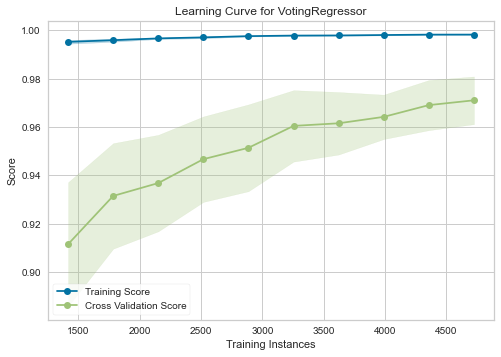

In [66]:
plot_model(blender_hard,plot='learning')

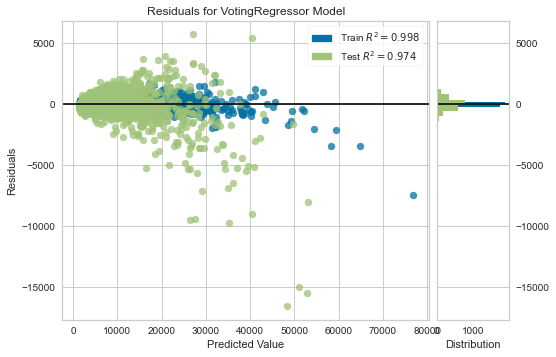

In [62]:
plot_model(blender_hard)

In [69]:
final_model = finalize_model(blender_hard)

In [71]:
final_pred = predict_model(final_model, data = test)

In [72]:
final_pred

,Flight Time,Class,is_dr,dobYear,dobMonth,dobWeek,dobDay,dobDayofweek,dobDayofyear,dobIs_month_end,...,bdIs_year_start,bdElapsed,age,is_bdbd,is_fdbd,depgap,is_weekend,distance,flight_duration,Label
0,19,10,0,2004,6,26,26,5,178,False,...,False,1455667200,12,False,False,47,False,417,55,2337.390324
1,17,10,1,1961,4,17,30,6,120,True,...,False,1453680000,55,False,False,43,False,417,60,4607.927428
2,13,25,1,1966,8,34,28,6,240,False,...,False,1451347200,50,False,False,13,False,417,60,11309.087147
3,13,10,1,1958,3,12,22,5,81,False,...,False,1473638400,58,False,False,31,False,1190,130,8083.985335
4,17,10,0,2000,2,5,1,1,32,False,...,False,1472860800,16,False,False,21,True,1760,155,8412.660092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,11,10,0,1956,3,13,29,3,89,False,...,False,1462665600,60,False,False,8,False,1028,95,7551.840883
2496,20,25,1,1979,3,12,25,6,84,False,...,False,1467158400,37,False,False,11,True,1190,130,32697.867931
2497,16,10,0,2003,9,36,6,5,249,False,...,False,1463788800,13,False,False,43,True,1760,155,8261.229950
2498,2,25,1,1960,11,46,19,5,324,False,...,False,1451260800,56,False,False,14,False,417,60,10413.989903


In [67]:
predictions = predict_model(blender_hard, data = test)

In [68]:
predictions

,Flight Time,Class,is_dr,dobYear,dobMonth,dobWeek,dobDay,dobDayofweek,dobDayofyear,dobIs_month_end,...,bdIs_year_start,bdElapsed,age,is_bdbd,is_fdbd,depgap,is_weekend,distance,flight_duration,Label
0,19,10,0,2004,6,26,26,5,178,False,...,False,1455667200,12,False,False,47,False,417,55,2422.590626
1,17,10,1,1961,4,17,30,6,120,True,...,False,1453680000,55,False,False,43,False,417,60,4161.626980
2,13,25,1,1966,8,34,28,6,240,False,...,False,1451347200,50,False,False,13,False,417,60,12129.914519
3,13,10,1,1958,3,12,22,5,81,False,...,False,1473638400,58,False,False,31,False,1190,130,8066.712584
4,17,10,0,2000,2,5,1,1,32,False,...,False,1472860800,16,False,False,21,True,1760,155,8472.890486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,11,10,0,1956,3,13,29,3,89,False,...,False,1462665600,60,False,False,8,False,1028,95,7766.661425
2496,20,25,1,1979,3,12,25,6,84,False,...,False,1467158400,37,False,False,11,True,1190,130,30312.646424
2497,16,10,0,2003,9,36,6,5,249,False,...,False,1463788800,13,False,False,43,True,1760,155,8746.525405
2498,2,25,1,1960,11,46,19,5,324,False,...,False,1451260800,56,False,False,14,False,417,60,10944.295161
